<a href="https://colab.research.google.com/github/HackMemory/infosec-math-modeling/blob/main/%D0%90%D0%BB%D0%B8%D0%B5%D0%B2_%D0%9C%D0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛР1

In [ ]:
import numpy as np
from math import exp
from scipy.optimize import bisect

# 1) Функция для вычисления подынтегральной функции

def integrand(x, p):
    """
    Подынтегральная функция e^(-p*x^2).
    """
    return np.exp(-p * x**2)

# 2) Метод численного интегрирования
def integrate_using_rectangles(p, a=0.0, b=1.0, n=100, mode='mid'):
    """
    Применение метода прямоугольников для численного вычисления интеграла.
    mode='left'  -> левые прямоугольники
    mode='right' -> правые прямоугольники
    mode='mid'   -> средние прямоугольники
    """
    x_values = np.linspace(a, b, n+1)
    step_size = (b - a) / n

    if mode == 'left':
        x_left = x_values[:-1]
        return np.sum(integrand(x_left, p)) * step_size
    elif mode == 'right':
        x_right = x_values[1:]
        return np.sum(integrand(x_right, p)) * step_size
    elif mode == 'mid':
        mid_points = 0.5 * (x_values[:-1] + x_values[1:])
        return np.sum(integrand(mid_points, p)) * step_size
    else:
        raise ValueError("Invalid method for rectangle rule.")

def integrate_using_trapezoid(p, a=0.0, b=1.0, n=100):
    """
    Применение метода трапеций для численного вычисления интеграла.
    """
    x_values = np.linspace(a, b, n+1)
    y_values = integrand(x_values, p)
    step_size = (b - a) / n
    return (step_size / 2) * (y_values[0] + 2 * np.sum(y_values[1:-1]) + y_values[-1])

def integrate_using_simpson(p, a=0.0, b=1.0, n=100):
    """
    Применение метода Симпсона для численного вычисления интеграла.
    Важно: n должен быть чётным для классической формулы Симпсона.
    Если n нечётно, мы увеличим его на 1.
    """
    if n % 2 != 0:
        n += 1  # Для обеспечения чётности разбиения

    x_values = np.linspace(a, b, n+1)
    y_values = integrand(x_values, p)
    step_size = (b - a) / n

    # Формула Симпсона:
    s_odd = np.sum(y_values[1:-1:2])    # элементы на нечётных позициях
    s_even = np.sum(y_values[2:-1:2])   # элементы на чётных позициях
    return (step_size / 3) * (y_values[0] + 4 * s_odd + 2 * s_even + y_values[-1])

# 3) Нахождение параметра p, при котором интеграл равен M
def find_p_for_integral(M=0.5, a=0.0, b=1.0, n=100, method='trapezoid', p_lower=0.0, p_upper=10.0):
    """
    Нахождение параметра p, при котором численный интеграл по выбранному методу равен M.

    method: 'rectangle', 'trapezoid', 'simpson'
    p_lower, p_upper: границы для поиска корня уравнения G(p)=0, где G(p) = интеграл - M.
    """

    def integral_function(p):
        if method == 'rectangle':
            return integrate_using_rectangles(p, a=a, b=b, n=n, mode='mid')
        elif method == 'trapezoid':
            return integrate_using_trapezoid(p, a=a, b=b, n=n)
        elif method == 'simpson':
            return integrate_using_simpson(p, a=a, b=b, n=n)
        else:
            raise ValueError("Неизвестный метод для численного интегрирования.")

    def G(p):
        return integral_function(p) - M

    # Проверим изменение знака функции на границах
    if G(p_lower) * G(p_upper) > 0:
        raise ValueError("Функция G(p) не меняет знак на отрезке [p_lower, p_upper]."
                         " Попробуйте расширить границы поиска.")

    # Используем метод бисекции для нахождения корня G(p)=0.
    optimal_p = bisect(G, p_lower, p_upper)
    return optimal_p

if __name__ == "__main__":
    # Заданное значение интеграла:
    M = 0.5
    # Границы интегрирования:
    a, b = 0.0, 1.0

    # 1) Сравниваем методы при фиксированном p (например, p=3.645).
    p_fixed = 3.645
    print(f"Сравнение интегралов для p={p_fixed} при различных n:")
    for n in [100, 500]:
        rect_value = integrate_using_rectangles(p_fixed, a, b, n, mode='mid')
        trap_value = integrate_using_trapezoid(p_fixed, a, b, n)
        simp_value = integrate_using_simpson(p_fixed, a, b, n)
        print(f"\n n = {n}:")
        print(f"  Метод прямоугольников (средний): {rect_value:.6f}")
        print(f"  Метод трапеций: {trap_value:.6f}")
        print(f"  Метод Симпсона: {simp_value:.6f}")

    # 2) Найдём p, при котором интеграл = 0.5, для разных методов и n.
    print("\nПоиск значения p, при котором интеграл равен 0.5")
    for method in ['rectangle', 'trapezoid', 'simpson']:
        for n in [100, 500]:
            p_found = find_p_for_integral(M=M, a=a, b=b, n=n, method=method, p_lower=0.0, p_upper=10.0)
            # Проверим, чему равен интеграл при найденном p:
            if method == 'rectangle':
                val = integrate_using_rectangles(p_found, a, b, n, mode='mid')
            elif method == 'trapezoid':
                val = integrate_using_trapezoid(p_found, a, b, n)
            else:
                val = integrate_using_simpson(p_found, a, b, n)

            print(f"\nМетод: {method},  n={n}")
            print(f"  Найденное значение p: {p_found:.6f}")
            print(f"  Проверка: интеграл ≈ {val:.6f}, заданное M = {M}")


Сравнение интегралов для p=3.645 при различных n:

 n = 100:
  Метод прямоугольников (средний): 0.460973
  Метод трапеций: 0.460970
  Метод Симпсона: 0.460972

 n = 500:
  Метод прямоугольников (средний): 0.460972
  Метод трапеций: 0.460972
  Метод Симпсона: 0.460972

Поиск значения p, при котором интеграл равен 0.5

Метод: rectangle,  n=100
  Найденное значение p: 3.057999
  Проверка: интеграл ≈ 0.500000, заданное M = 0.5

Метод: rectangle,  n=500
  Найденное значение p: 3.057984
  Проверка: интеграл ≈ 0.500000, заданное M = 0.5

Метод: trapezoid,  n=100
  Найденное значение p: 3.057951
  Проверка: интеграл ≈ 0.500000, заданное M = 0.5

Метод: trapezoid,  n=500
  Найденное значение p: 3.057982
  Проверка: интеграл ≈ 0.500000, заданное M = 0.5

Метод: simpson,  n=100
  Найденное значение p: 3.057983
  Проверка: интеграл ≈ 0.500000, заданное M = 0.5

Метод: simpson,  n=500
  Найденное значение p: 3.057983
  Проверка: интеграл ≈ 0.500000, заданное M = 0.5


ЛР2

In [ ]:
import numpy as np

def solve_linear_system(A, b):
    """
    Пытаемся решить систему A x = b.
    Если возникает ошибка (матрица вырождена), используем метод наименьших квадратов.
    Возвращаем решение x.
    """
    try:
        x = np.linalg.solve(A, b)
    except np.linalg.LinAlgError as e:
        print("Ошибка при решении системы:", e)
        x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
    return x

def solve_with_perturbation(A, b, delta=1e-6, row=0, col=0):
    """
    1) Решает систему A x = b.
    2) Добавляет небольшое возмущение delta к элементу A[row, col].
    3) Снова решает систему с изменённой матрицей.

    Возвращает:
      - x         : решение исходной системы,
      - x_pert    : решение системы с возмущением,
      - condA     : число обусловленности исходной матрицы A,
      - condA_pert: число обусловленности возмущённой матрицы,
      - rel_diff_x: относительное изменение решения (||Δx||/||x||),
      - rel_diff_A: относительное изменение матрицы (||ΔA||/||A||).
    """
    # Решаем исходную систему
    x = solve_linear_system(A, b)
    condA = np.linalg.cond(A)

    # Создаём изменённую матрицу
    A_perturbed = A.copy()
    A_perturbed[row, col] += delta
    condA_perturbed = np.linalg.cond(A_perturbed)

    # Решаем систему для изменённой матрицы
    x_perturbed = solve_linear_system(A_perturbed, b)

    # Рассчитываем относительные изменения
    diff_x = x_perturbed - x
    rel_diff_x = np.linalg.norm(diff_x) / (np.linalg.norm(x) + 1e-16)

    diff_A = A_perturbed - A
    rel_diff_A = np.linalg.norm(diff_A) / (np.linalg.norm(A) + 1e-16)

    return x, x_perturbed, condA, condA_perturbed, rel_diff_x, rel_diff_A

def display_results(title, A, b, x, x_perturbed, condA, condA_perturbed, rel_diff_x, rel_diff_A):
    """
    Выводит результаты в удобочитаемом формате.
    """
    print(f"===== {title} =====")
    print("Исходная матрица A:")
    print(A)
    print("\nВектор правых частей b:")
    print(b)
    print(f"\nЧисло обусловленности cond(A)     = {condA:.2e}")
    print(f"Решение x                        = {x}")
    print("Применяем небольшое возмущение к элементу матрицы...")
    print(f"Число обусловленности cond(A_perturbed) = {condA_perturbed:.2e}")
    print(f"Решение x с возмущением x_perturbed = {x_perturbed}")
    print(f"\nОтносительное изменение решения ||Δx||/||x|| = {rel_diff_x:.2e}")
    print(f"Относительное изменение матрицы  ||ΔA||/||A|| = {rel_diff_A:.2e}")
    print("----------------------------------------------------------\n")

def main():

    # Пример 1. Плохо обусловленная матрица 3x3

    A1 = np.array([
        [10.0,   9.9999,  0.0],
        [9.9999, 9.9998,  0.0],
        [0.0,    0.0,     1e-4]
    ])
    b1 = np.array([19.9999, 19.9997, 1e-4])

    x1, x1_perturbed, c1, c1_perturbed, rd1, ra1 = solve_with_perturbation(A1, b1, delta=1e-6, row=0, col=1)
    display_results("Пример 1 (Плохо обусловленная матрица 3x3)", A1, b1, x1, x1_perturbed, c1, c1_perturbed, rd1, ra1)

    # Пример 2. Почти вырожденная матрица 3x3
    A2 = np.array([
        [1.0, 2.0, 3.0],
        [2.0, 4.0, 6.0],     # Линейно зависимая строка (2 * первая)
        [0.0, 1e-7, 1.0]
    ])
    b2 = np.array([6.0, 12.0, 1.0000001])

    x2, x2_perturbed, c2, c2_perturbed, rd2, ra2 = solve_with_perturbation(A2, b2, delta=1e-7, row=2, col=1)
    display_results("Пример 2 (Почти вырожденная матрица 3x3)", A2, b2, x2, x2_perturbed, c2, c2_perturbed, rd2, ra2)

    # Пример 3. Плохо обусловленная матрица 10x10

    # Создаём случайную матрицу и изменяем одну строку, чтобы она была почти линейной комбинацией других
    np.random.seed(42)
    A3 = np.random.randn(10, 10)
    # Изменяем 8-ю строку (индекс 7) так, чтобы она была почти линейной комбинацией других
    A3[7, :] = A3[0, :] + 1e-6 * A3[1, :] - A3[2, :]
    b3 = np.random.randn(10) * 2.0

    x3, x3_perturbed, c3, c3_perturbed, rd3, ra3 = solve_with_perturbation(A3, b3, delta=1e-8, row=7, col=5)
    display_results("Пример 3 (Плохо обусловленная матрица 10x10)", A3, b3, x3, x3_perturbed, c3, c3_perturbed, rd3, ra3)

if __name__ == "__main__":
    main()


===== Пример 1 (Плохо обусловленная матрица 3x3) =====
Исходная матрица A:
[[1.0000e+01 9.9999e+00 0.0000e+00]
 [9.9999e+00 9.9998e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.0000e-04]]

Вектор правых частей b:
[1.99999e+01 1.99997e+01 1.00000e-04]

Число обусловленности cond(A)     = 4.00e+10
Решение x                        = [1. 1. 1.]
Применяем небольшое возмущение к элементу матрицы...
Число обусловленности cond(A_perturbed) = 4.00e+07
Решение x с возмущением x_perturbed = [1.99899100e+00 9.99011062e-04 1.00000000e+00]

Относительное изменение решения ||Δx||/||x|| = 8.16e-01
Относительное изменение матрицы  ||ΔA||/||A|| = 5.00e-08
----------------------------------------------------------

Ошибка при решении системы: Singular matrix
Ошибка при решении системы: Singular matrix
===== Пример 2 (Почти вырожденная матрица 3x3) =====
Исходная матрица A:
[[1.e+00 2.e+00 3.e+00]
 [2.e+00 4.e+00 6.e+00]
 [0.e+00 1.e-07 1.e+00]]

Вектор правых частей b:
[ 6.        12.         1.0000001]

Чис

ЛР3

In [ ]:
import numpy as np
import numpy.linalg as la

# Параметры задачи
num_rows, num_cols = 10, 6  # Размерность системы (10 строк и 6 столбцов)
reg_param = 0.1   # Параметр регуляризации Тихонова (можно настроить для экспериментов)

# Устанавливаем фиксированное начальное зерно для воспроизводимости
np.random.seed(42)

# Генерация данных для задачи
x_actual = np.random.randn(num_cols)

# Генерация матрицы A размером 10x6 с случайными значениями
A_matrix = np.random.randn(num_rows, num_cols)

# Формирование вектора правых частей b = A * x_actual + небольшой шум
noise_level = 0.01
random_noise = noise_level * np.random.randn(num_rows)
b_vector = A_matrix.dot(x_actual) + random_noise

# Печать информации
print("Сгенерированная матрица A (размер {}x{}):\n".format(num_rows, num_cols), A_matrix)
print("\n'Истинное' решение x_actual:\n", x_actual)
print("\nВектор b = A*x_actual + шум:\n", b_vector)

# Решение без регуляризации
# 1) Обычное решение (псевдонаименьших квадратов или прямое решение)

# 1A) Ручной способ: x_ls = (A^T A)^(-1) A^T b
A_transpose = A_matrix.T
A_T_A = A_transpose @ A_matrix        # Размерность (m x m)
A_T_b = A_transpose @ b_vector        # Размерность (m)
x_ls_manual = la.inv(A_T_A) @ A_T_b

# 1B) Через встроенную функцию lstsq
x_ls_lstsq, residuals, rank, svals = la.lstsq(A_matrix, b_vector, rcond=None)

print("\nРЕШЕНИЕ БЕЗ РЕГУЛЯРИЗАЦИИ ")
print("Решение (ручное) x_ls_manual:\n", x_ls_manual)
print("Решение (lstsq)  x_ls_lstsq:\n", x_ls_lstsq)

# Сравниваем решения с "истинным" значением x_actual
manual_diff = la.norm(x_ls_manual - x_actual)
lstsq_diff = la.norm(x_ls_lstsq - x_actual)
print("\nОтклонение x_ls_manual от x_actual:", manual_diff)
print("Отклонение x_ls_lstsq  от x_actual:", lstsq_diff)

# Анализ чувствительности к шуму в данных
# Генерация нового вектора b с усиленным шумом
b_perturbed = b_vector + 5 * noise_level * np.random.randn(num_rows)  # Усиление шума в 5 раз

# Считаем решение для возмущённого b
x_perturbed_lstsq, _, _, _ = la.lstsq(A_matrix, b_perturbed, rcond=None)

print("\nЧУВСТВИТЕЛЬНОСТЬ К ДОПОЛНИТЕЛЬНОМУ ШУМУ В ДАННЫХ ")
print("Возмущённый вектор b_perturbed:\n", b_perturbed)
print("Решение x_perturbed_lstsq:\n", x_perturbed_lstsq)
print("Отклонение этого решения от x_actual =", la.norm(x_perturbed_lstsq - x_actual))

# Решение с использованием регуляризации Тихонова
# Формула: x_alpha = (A^T A + alpha^2 I)^(-1) A^T b
identity_matrix = np.eye(num_cols)
x_tikhonov = la.inv(A_T_A + reg_param**2 * identity_matrix) @ A_T_b

print("\nРЕШЕНИЕ С РЕГУЛЯРИЗАЦИЕЙ ТИХОНОВА ")
print(f"Параметр регуляризации alpha = {reg_param}")
print("Решение x_tikhonov:\n", x_tikhonov)
print("Отклонение от x_actual =", la.norm(x_tikhonov - x_actual))

# Проверка решения с возмущённым b
b_perturbed_Tb = A_transpose @ b_perturbed  # A^T * b_perturbed
x_tikhonov_perturbed = la.inv(A_T_A + reg_param**2 * identity_matrix) @ b_perturbed_Tb
print("\nРешение с регуляризацией Тихонова при возмущённом b:")
print("x_tikhonov_perturbed:\n", x_tikhonov_perturbed)
print("Отклонение от x_actual =", la.norm(x_tikhonov_perturbed - x_actual))

# Сравнительный вывод
# Показать, что решение Тихонова более устойчиво к шуму
print("\nСРАВНЕНИЕ ИЗМЕНЕНИЯ РЕШЕНИЯ ПРИ ВОЗМУЩЕНИИ b ")
delta_x_no_reg = la.norm(x_perturbed_lstsq - x_ls_lstsq)
delta_x_tikh = la.norm(x_tikhonov_perturbed - x_tikhonov)
print("Без регуляризации: || x_perturbed - x || =", delta_x_no_reg)
print("С регуляризацией:  || x_perturbed - x || =", delta_x_tikh)


Сгенерированная матрица A (размер 10x6):
 [[ 1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828]
 [-0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223]
 [ 0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629]
 [ 1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513]
 [-0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003]]

'Истинное' решение x_actual:
 [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696]

Вектор b = A*x_actual + шум:
 [ 1.41740576 -1.41524952  0.67105324 -0.25653862 -2.07779055 -0.3833851

ЛР4 | Агапова 1-5

In [ ]:
import numpy as np
import math
import numpy.linalg as la

def task1():
    """
    Определим, какое равенство точнее: sqrt(74) = 6.63 или 19/41 = 0.463.
    Рассчитаем абсолютные и относительные погрешности для каждого из случаев.
    """
    true_sqrt74 = math.sqrt(74)
    approx_sqrt74 = 6.63

    abs_err_sqrt = abs(true_sqrt74 - approx_sqrt74)
    rel_err_sqrt = abs_err_sqrt / abs(true_sqrt74)

    true_19_41 = 19.0 / 41.0
    approx_19_41 = 0.463

    abs_err_frac = abs(true_19_41 - approx_19_41)
    rel_err_frac = abs_err_frac / abs(true_19_41)

    print("Результаты для сравнения равенств:")
    print(f"Точное значение sqrt(74) ≈ {true_sqrt74:.6f}, приближение: {approx_sqrt74}")
    print(f"  Абс. погрешность: {abs_err_sqrt:.6f},  Относительная: {rel_err_sqrt:.4%}")
    print(f"\nТочное значение 19/41 ≈ {true_19_41:.6f}, приближение: {approx_19_41}")
    print(f"  Абс. погрешность: {abs_err_frac:.6f},  Относительная: {rel_err_frac:.4%}")

    if rel_err_sqrt < rel_err_frac:
        print("\nРавенство sqrt(74)=6,63 точнее (меньшая относительная погрешность).")
    else:
        print("\nРавенство 19/41=0,463 точнее (меньшая относительная погрешность).")


def task2():
    """
    Округлим два числа 22.553 и 0.2468 с учётом различий в точности, сохраняя лишь 'верные' цифры.
    Затем вычислим погрешности для каждого округления.
    """
    original_a = 22.553
    approx_a_narrow = 22.55
    approx_a_wide = 22.553

    err_narrow_a = abs(original_a - approx_a_narrow)
    err_wide_a = abs(original_a - approx_a_wide)

    original_b = 0.2468
    approx_b_narrow = 0.247
    approx_b_wide = 0.2468

    err_narrow_b = abs(original_b - approx_b_narrow)
    err_wide_b = abs(original_b - approx_b_wide)

    print("\nРезультаты округлений:")
    print(f"(a) Число 22.553: Узкое округление: {approx_a_narrow}, погрешность = {err_narrow_a:.5f}")
    print(f"  Широкое округление: {approx_a_wide}, погрешность = {err_wide_a:.5f}")
    print(f"(b) Число 0.2468: Узкое округление: {approx_b_narrow}, погрешность = {err_narrow_b:.5f}")
    print(f"  Широкое округление: {approx_b_wide}, погрешность = {err_wide_b:.5f}")


def task3():
    """
    Найдем предельные абсолютные и относительные погрешности для чисел 9.238 и 42.884.
    Оценим погрешности, используя последнюю цифру для расчета.
    """
    def max_abs_rel_error(approx_val):
        s = str(approx_val)
        if '.' in s:
            decimals = len(s.split('.')[1])
        else:
            decimals = 0

        delta = 0.5 * 10**(-decimals)
        abs_err = delta
        rel_err = abs_err / abs(approx_val)
        return abs_err, rel_err

    val_a = 9.238
    val_b = 42.884

    abs_a, rel_a = max_abs_rel_error(val_a)
    abs_b, rel_b = max_abs_rel_error(val_b)

    print("\nРезультаты для предельных погрешностей:")
    print(f"(a) Число {val_a}: Абс. погрешность = {abs_a}, Отн. погрешность = {rel_a:.6%}")
    print(f"(b) Число {val_b}: Абс. погрешность = {abs_b}, Отн. погрешность = {rel_b:.6%}")


def task4():
    """
    Умножим два приближённых числа a=8.4 и b=0.0124, затем оценим погрешности.
    """
    a = 8.4
    b = 0.0124
    exact_prod = a * b

    approx_prod = 0.10  # округление до 2 значащих цифр

    abs_error = abs(exact_prod - approx_prod)
    rel_error = abs_error / abs(exact_prod)

    print("\nРезультат произведения с округлением:")
    print(f"a = {a}, b = {b}")
    print(f"Точное произведение: {exact_prod:.6f}")
    print(f"Округлённое значение: {approx_prod}")
    print(f"Абсолютная погрешность: {abs_error:.6f}")
    print(f"Относительная погрешность: {rel_error:.2%}")


def task5():
    """
    Вычислим x^5 для x = 2.3284 и оценим погрешность результата.
    """
    x = 2.3284

    # Вычисление x^5
    result = x**5

    # Оценка погрешности
    derivative = 5 * x**4
    error_estimate = abs(derivative * 1e-4)

    print("\nРезультат для x^5 с оценкой погрешности:")
    print(f"x = {x}")
    print(f"x^5 = {result:.6f}")
    print(f"Оценка погрешности: {error_estimate:.6e}")


def main():
    task1()
    task2()
    task3()
    task4()
    task5()

if __name__ == "__main__":
    main()


Результаты для сравнения равенств:
Точное значение sqrt(74) ≈ 8.602325, приближение: 6.63
  Абс. погрешность: 1.972325,  Относительная: 22.9278%

Точное значение 19/41 ≈ 0.463415, приближение: 0.463
  Абс. погрешность: 0.000415,  Относительная: 0.0895%

Равенство 19/41=0,463 точнее (меньшая относительная погрешность).

Результаты округлений:
(a) Число 22.553: Узкое округление: 22.55, погрешность = 0.00300
  Широкое округление: 22.553, погрешность = 0.00000
(b) Число 0.2468: Узкое округление: 0.247, погрешность = 0.00020
  Широкое округление: 0.2468, погрешность = 0.00000

Результаты для предельных погрешностей:
(a) Число 9.238: Абс. погрешность = 0.0005, Отн. погрешность = 0.005412%
(b) Число 42.884: Абс. погрешность = 0.0005, Отн. погрешность = 0.001166%

Результат произведения с округлением:
a = 8.4, b = 0.0124
Точное произведение: 0.104160
Округлённое значение: 0.1
Абсолютная погрешность: 0.004160
Относительная погрешность: 3.99%

Результат для x^5 с оценкой погрешности:
x = 2.3284


ЛР5
Рассмотрим задачу:

Максимизировать z=2x+5y

при ограничениях: x+y≤6, 3x+y≤9, x≥0,y≥0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def simplex_method():
    """
    Решение задачи линейного программирования методом симплекса через scipy.optimize.linprog.
    """
    # Определяем коэффициенты целевой функции (для максимизации 2x + 5y)
    # В scipy.optimize.linprog решаем задачу минимизации, поэтому
    # для максимизации 2x + 5y задаём c = [-2, -5]
    c = [-2, -5]

    # Матрица A_ub и вектор b_ub для неравенств A_ub * x <= b_ub
    A_ub = [
        [1, 1],   # x + y <= 6
        [3, 1]    # 3x + y <= 9
    ]
    b_ub = [6, 9]

    # Границы переменных (x >= 0, y >= 0)
    x_bounds = (0, None)
    y_bounds = (0, None)

    # Решаем задачу линейного программирования
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, y_bounds],
                  method='highs')  # 'highs' - рекомендуемый алгоритм

    print("=== РЕШЕНИЕ ЗАДАЧИ ЛИНЕЙНОГО ПРОГРАММИРОВАНИЯ (scipy) ===")
    if res.success:
        # Извлекаем оптимальные значения x и y
        opt_x, opt_y = res.x
        # Вычисляем значение целевой функции
        opt_val = -res.fun  # Мы минимизировали -z = -2x - 5y, поэтому результат нужно инвертировать
        print(f"Оптимальное решение: x = {opt_x:.4f}, y = {opt_y:.4f}")
        print(f"Значение целевой функции: z = {opt_val:.4f}")
    else:
        print("Не удалось найти решение:", res.message)

# Запуск решения задачи
simplex_method()


=== РЕШЕНИЕ ЗАДАЧИ ЛИНЕЙНОГО ПРОГРАММИРОВАНИЯ (scipy) ===
Оптимальное решение: x = 0.0000, y = 6.0000
Значение целевой функции: z = 30.0000


Построение графиков

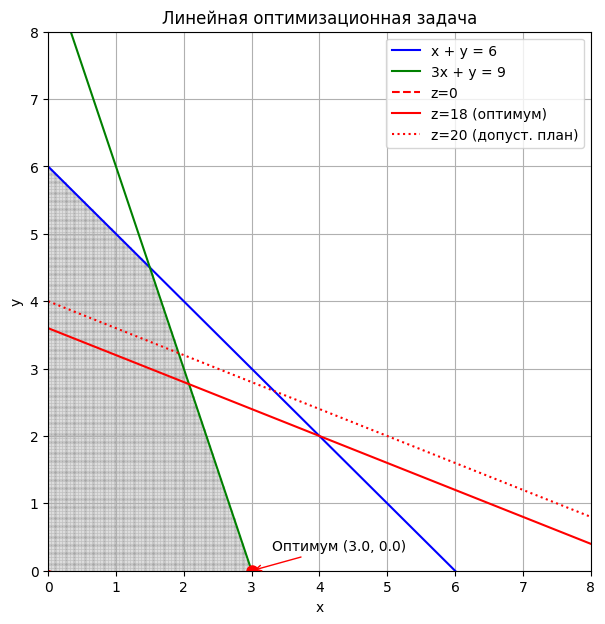

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_optimization_graph():
    """
    Построим график для линейной оптимизационной задачи:
    Максимизировать z = 2x + 5y
    При ограничениях:
    x + y <= 6
    3x + y <= 9
    x >= 0, y >= 0
    """
    # Диапазоны значений для x и y
    x_vals = np.linspace(0, 8, 200)
    y_vals = np.linspace(0, 8, 200)
    X, Y = np.meshgrid(x_vals, y_vals)

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Линейная оптимизационная задача')

    # Построим прямые ограничений
    # x + y = 6 => y = 6 - x
    y1 = 6 - x_vals
    ax.plot(x_vals, y1, label='x + y = 6', color='blue')

    # 3x + y = 9 => y = 9 - 3x
    y2 = 9 - 3*x_vals
    ax.plot(x_vals, y2, label='3x + y = 9', color='green')

    # Заштрихуем область допустимых решений
    feasible_x = []
    feasible_y = []
    for xv in x_vals:
        for yv in y_vals:
            if (xv + yv <= 6 + 1e-9) and (3*xv + yv <= 9 + 1e-9) and (xv >= 0) and (yv >= 0):
                feasible_x.append(xv)
                feasible_y.append(yv)

    ax.scatter(feasible_x, feasible_y, s=2, color='gray', alpha=0.3)

    # Линии уровня целевой функции 2x + 5y = c
    def plot_obj_line(ax, c, label_str, style, color='red'):
        y_line = (c - 2*x_vals) / 5
        ax.plot(x_vals, y_line, style, label=label_str, color=color)

    plot_obj_line(ax, c=0,  label_str='z=0',    style='--')   # через (0,0)
    plot_obj_line(ax, c=18, label_str='z=18 (оптимум)', style='-')   # через (3,0)
    plot_obj_line(ax, c=20, label_str='z=20 (допуст. план)', style=':')  # через (4,2)

    # Оптимальная точка (3, 0) для максимизации
    opt_x, opt_y = 3, 0
    ax.plot(opt_x, opt_y, 'ro', ms=8)
    ax.annotate(f"Оптимум ({opt_x:.1f}, {opt_y:.1f})",
                xy=(opt_x, opt_y), xytext=(opt_x+0.3, opt_y+0.3),
                arrowprops=dict(arrowstyle='->', color='r'))

    ax.legend()
    ax.grid(True)
    plt.show()

# Вызов функции для построения графика
plot_optimization_graph()


Исследование чувствительности к изменениям коэффициентов целевой функции


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def solve_and_print(a, b):
    """
    Решение задачи линейного программирования для целевой функции a*x + b*y.
    Мы минимизируем -a*x - b*y, чтобы решить задачу максимизации.
    """
    c = [-a, -b]  # Мы минимизируем -a*x - b*y для максимизации a*x + b*y
    A_ub = [
        [1, 1],   # x + y <= 6
        [3, 1]    # 3x + y <= 9
    ]
    b_ub = [6, 9]
    x_bounds = (0, None)
    y_bounds = (0, None)

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, y_bounds], method='highs')

    if res.success:
        return res.x, -res.fun  # Возвращаем решение и значение целевой функции
    else:
        return None, None

print("\n=== АНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ: изменение a,b в Z = a*x + b*y ===")
# Пройдемся по нескольким значениям a,b
for da in [-0.5, 0, 0.5]:
    for db in [-0.5, 0, 0.5]:
        new_a = 2 + da
        new_b = 5 + db
        sol, val = solve_and_print(new_a, new_b)
        print(f"a={new_a}, b={new_b} -> решение: {sol},  Z={val:.2f}")



=== АНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ: изменение a,b в Z = a*x + b*y ===
a=1.5, b=4.5 -> решение: [0. 6.],  Z=27.00
a=1.5, b=5 -> решение: [0. 6.],  Z=30.00
a=1.5, b=5.5 -> решение: [0. 6.],  Z=33.00
a=2, b=4.5 -> решение: [0. 6.],  Z=27.00
a=2, b=5 -> решение: [0. 6.],  Z=30.00
a=2, b=5.5 -> решение: [0. 6.],  Z=33.00
a=2.5, b=4.5 -> решение: [0. 6.],  Z=27.00
a=2.5, b=5 -> решение: [0. 6.],  Z=30.00
a=2.5, b=5.5 -> решение: [0. 6.],  Z=33.00


Построение симплекс таблицы

In [ ]:
import numpy as np

def print_tableau(T, basic, var_names):
    """
    Выводит симплекс-табло.
    T       : матрица с (m+1) строками и (n+m+1) столбцами (последний столбец – RHS)
    basic   : список индексов базисных переменных (для каждой строки ограничений)
    var_names: список имён всех переменных (включая исходные и slack)
    """
    header = "Basis | " + "  ".join([f"{name:>8}" for name in var_names]) + " |   RHS"
    print(header)
    print("-" * len(header))
    num_rows = T.shape[0]
    # Вывод строк ограничений (первые m строк)
    for i in range(num_rows - 1):
        basis_var = var_names[basic[i]]
        row_vals = " ".join(f"{val:8.3f}" for val in T[i, :-1])
        rhs = T[i, -1]
        print(f"{basis_var:>5} | {row_vals} | {rhs:8.3f}")
    # Вывод строки цели (последняя строка)
    print("  z   | " + " ".join(f"{val:8.3f}" for val in T[-1, :-1]) + f" | {T[-1,-1]:8.3f}")
    print()

def manual_simplex(c, A, b):
    """
    Решает задачу ЛП: max c^T x, при Ax ≤ b, x ≥ 0.
    Переходит к канонической форме (добавляет slack-переменные) и выполняет симплекс-метод.

    Параметры:
       c : список коэффициентов целевой функции (для переменных x)
       A : коэффициентная матрица ограничений (размера m x n)
       b : вектор правой части ограничений (размера m)

    Возвращает:
       оптимальное решение (для x) и оптимальное значение цели.
    """
    m, n = A.shape  # m - число ограничений, n - число исходных переменных
    total_vars = n + m  # исходные + slack-переменные

    # Построение исходного симплекс-табло T размером (m+1) x (total_vars+1):
    # Первые m строк – ограничения, последняя строка – целевая функция.
    T = np.zeros((m + 1, total_vars + 1))

    # Заполняем строки ограничений:
    T[:m, :n] = A
    T[:m, n:n+m] = np.eye(m)    # slack-переменные (единичная матрица)
    T[:m, -1] = b              # правые части

    # Строка цели (максимизация):
    # В симплекс-методе задачи максимизации приводят к минимизации -z.
    T[m, :n] = -np.array(c)     # коэффициенты -c для исходных переменных; slack-переменные получают 0.
    T[m, -1] = 0.0

    # Имена переменных: первые n – исходные, затем m – slack-переменные
    var_names = [f"x{i+1}" for i in range(n)] + [f"s{i+1}" for i in range(m)]

    # Начальное базисное множество: slack-переменные (индексы n, n+1, ..., n+m-1)
    basic = list(range(n, n + m))

    iteration = 0
    print(f"Начальный симплекс-табло (итерация {iteration}):")
    print_tableau(T, basic, var_names)

    # Основной цикл симплекс-метода:
    while True:
        # Строка цели (последняя строка)
        obj_row = T[m, :-1]
        # Если все коэффициенты неотрицательные (с допуском), оптимальность достигнута:
        if np.all(obj_row >= -1e-9):
            break

        # Выбор входящей переменной:
        # Выбираем столбец с минимальным значением (наиболее отрицательное)
        pivot_col = np.argmin(obj_row)

        # Тест отношения: для каждой строки ограничения, где T[i, pivot_col] > 0,
        # вычисляем отношение (RHS / T[i, pivot_col])
        ratios = []
        for i in range(m):
            if T[i, pivot_col] > 1e-9:
                ratios.append(T[i, -1] / T[i, pivot_col])
            else:
                ratios.append(np.inf)
        pivot_row = np.argmin(ratios)

        # Если для входящей переменной не найдено положительных коэффициентов, задача неограничена.
        if ratios[pivot_row] == np.inf:
            print("Задача не ограничена!")
            return None, None

        # Пивот-операция:
        pivot_val = T[pivot_row, pivot_col]
        T[pivot_row, :] = T[pivot_row, :] / pivot_val
        for i in range(m + 1):
            if i != pivot_row:
                T[i, :] = T[i, :] - T[i, pivot_col] * T[pivot_row, :]

        # Обновляем базис: переменная, соответствующая pivot_col, входит в базис на месте pivot_row.
        basic[pivot_row] = pivot_col
        iteration += 1
        print(f"Итерация {iteration}: Пивот в строке {pivot_row+1}, столбце {pivot_col+1} (переменная {var_names[pivot_col]} входит в базис)")
        print_tableau(T, basic, var_names)

    # Оптимальное решение:
    solution = np.zeros(total_vars)
    for i in range(m):
        solution[basic[i]] = T[i, -1]
    opt_val = T[m, -1]  # оптимальное значение (так как мы минимизировали -z, opt_val = z)

    # Возвращаем только решения для исходных переменных (x1, x2, ..., x_n)
    return solution[:n], opt_val

# Пример использования:
if __name__ == "__main__":
    # Задана задача:
    # max z = 2x + 5y, ограничения:
    #       x + y <= 6
    #       3x + y <= 9
    #       x, y >= 0
    c = [2, 5]
    A = np.array([
        [1, 1],
        [3, 1]
    ])
    b = np.array([6, 9])

    opt_solution, opt_value = manual_simplex(c, A, b)
    print("Оптимальное решение задачи:")
    print("x =", opt_solution)
    print("Оптимальное значение целевой функции (z) =", opt_value)


Начальный симплекс-табло (итерация 0):
Basis |       x1        x2        s1        s2 |   RHS
------------------------------------------------------
   s1 |    1.000    1.000    1.000    0.000 |    6.000
   s2 |    3.000    1.000    0.000    1.000 |    9.000
  z   |   -2.000   -5.000    0.000    0.000 |    0.000

Итерация 1: Пивот в строке 1, столбце 2 (переменная x2 входит в базис)
Basis |       x1        x2        s1        s2 |   RHS
------------------------------------------------------
   x2 |    1.000    1.000    1.000    0.000 |    6.000
   s2 |    2.000    0.000   -1.000    1.000 |    3.000
  z   |    3.000    0.000    5.000    0.000 |   30.000

Оптимальное решение задачи:
x = [0. 6.]
Оптимальное значение целевой функции (z) = 30.0


ЛР6

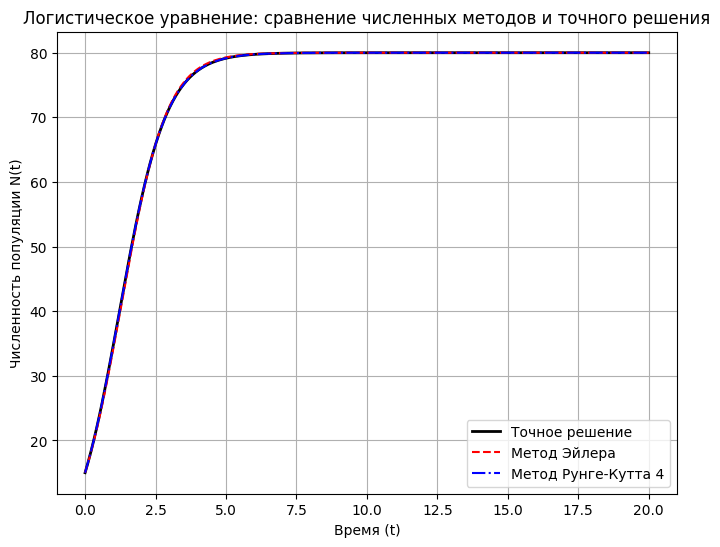

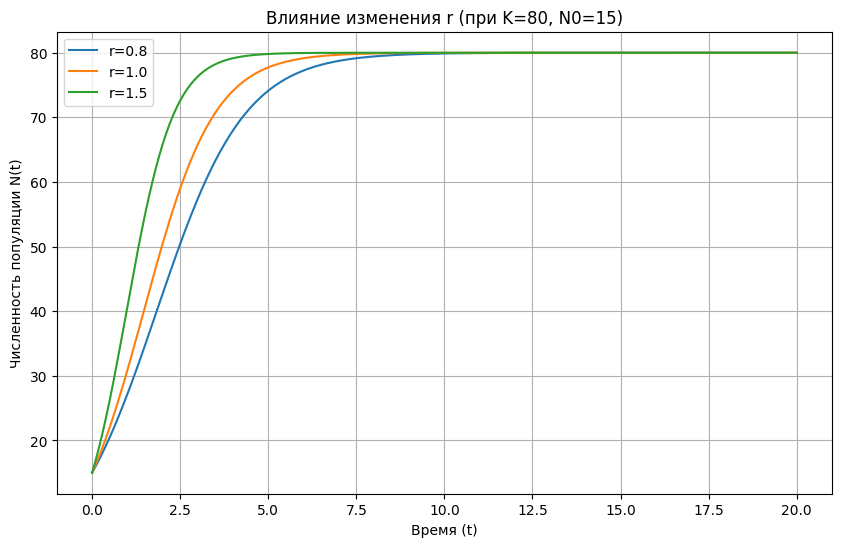

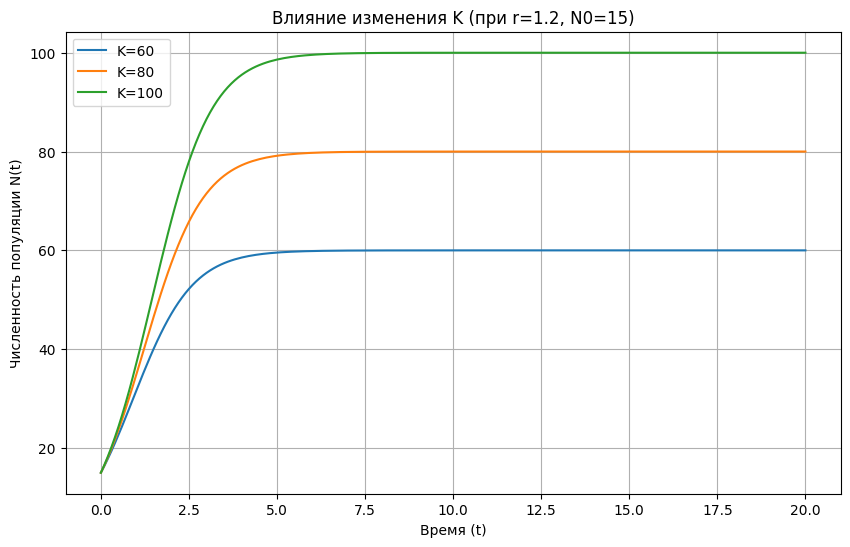

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи с новыми значениями
growth_rate = 1.2  # скорость роста популяции
capacity = 80.0    # ёмкость среды
initial_population = 15.0  # начальное количество особей

start_time = 0.0  # начальный момент времени
end_time = 20.0   # конечное время моделирования
step_size = 0.1   # шаг интегрирования

# Функция для вычисления правой части логистического уравнения
def logistic_rhs_func(time, population, growth_rate, capacity):
    return growth_rate * population * (1 - population / capacity)

# Точное решение логистического уравнения
def exact_solution(time, growth_rate, capacity, initial_population):
    return capacity / (1 + ((capacity / initial_population) - 1) * np.exp(-growth_rate * time))

# Метод Эйлера
def euler_method(rhs_func, t0, y0, t_max, h, r, K):
    steps = int((t_max - t0) / h) + 1
    time_values = np.zeros(steps)
    population_values = np.zeros(steps)
    time_values[0] = t0
    population_values[0] = y0

    for i in range(steps - 1):
        t = time_values[i]
        y = population_values[i]
        population_values[i + 1] = y + h * rhs_func(t, y, r, K)
        time_values[i + 1] = t + h

    return time_values, population_values

# Метод Рунге-Кутта 4-го порядка
def rk4_method(rhs_func, t0, y0, t_max, h, r, K):
    steps = int((t_max - t0) / h) + 1
    time_values = np.zeros(steps)
    population_values = np.zeros(steps)
    time_values[0] = t0
    population_values[0] = y0

    for i in range(steps - 1):
        t = time_values[i]
        y = population_values[i]

        k1 = rhs_func(t, y, r, K)
        k2 = rhs_func(t + h / 2, y + (h / 2) * k1, r, K)
        k3 = rhs_func(t + h / 2, y + (h / 2) * k2, r, K)
        k4 = rhs_func(t + h, y + h * k3, r, K)

        population_values[i + 1] = y + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        time_values[i + 1] = t + h

    return time_values, population_values

# Сравнение с точным решением
# Численные решения методом Эйлера и Рунге-Кутта 4-го порядка
time_euler, population_euler = euler_method(logistic_rhs_func, start_time, initial_population, end_time, step_size, growth_rate, capacity)
time_rk4, population_rk4 = rk4_method(logistic_rhs_func, start_time, initial_population, end_time, step_size, growth_rate, capacity)

# Точное решение
time_exact = np.linspace(start_time, end_time, 200)
population_exact = exact_solution(time_exact, growth_rate, capacity, initial_population)

# Построение графиков
plt.figure(figsize=(8, 6))
plt.plot(time_exact, population_exact, 'k-', label='Точное решение', linewidth=2)
plt.plot(time_euler, population_euler, 'r--', label='Метод Эйлера')
plt.plot(time_rk4, population_rk4, 'b-.', label='Метод Рунге-Кутта 4')
plt.title('Логистическое уравнение: сравнение численных методов и точного решения')
plt.xlabel('Время (t)')
plt.ylabel('Численность популяции N(t)')
plt.grid(True)
plt.legend()
plt.show()

# Анализ чувствительности к изменениям параметров
growth_rate_values = [0.8, 1.0, 1.5]
capacity_values = [60, 80, 100]

# Влияние изменения коэффициента роста
plt.figure(figsize=(10, 6))

for r_val in growth_rate_values:
    time_temp, population_temp = rk4_method(logistic_rhs_func, start_time, initial_population, end_time, step_size, r_val, capacity)
    plt.plot(time_temp, population_temp, label=f"r={r_val}")

plt.title("Влияние изменения r (при K=80, N0=15)")
plt.xlabel('Время (t)')
plt.ylabel('Численность популяции N(t)')
plt.grid(True)
plt.legend()
plt.show()

# Влияние изменения ёмкости среды
plt.figure(figsize=(10, 6))

for K_val in capacity_values:
    time_temp, population_temp = rk4_method(logistic_rhs_func, start_time, initial_population, end_time, step_size, growth_rate, K_val)
    plt.plot(time_temp, population_temp, label=f"K={K_val}")

plt.title("Влияние изменения K (при r=1.2, N0=15)")
plt.xlabel('Время (t)')
plt.ylabel('Численность популяции N(t)')
plt.grid(True)
plt.legend()
plt.show()


ЛР7 Козлова стр 21/задача 2

In [ ]:
import numpy as np

# Интенсивности переходов (матрица Q)
Q = np.array([
    [-14, 5, 0, 16],   # Переходы из S1
    [14, -15, 0, 0],    # Переходы из S2
    [0, 15, -7, 4],     # Переходы из S3
    [0, 0, 7, -16]      # Переходы из S4
])

# Доходы в каждом состоянии
revenue = np.array([12, 10, 15, 6])

# Размерность системы (количество состояний)
n = len(revenue)

# Матрица коэффициентов для нахождения предельных вероятностей (P)
A = Q.T
# Добавляем условие, что сумма вероятностей равна 1
A = np.vstack([A, np.ones(n)])

# Вектор доходов (результат решения)
b = np.zeros(n)
b = np.append(b, 1)

# Находим предельные вероятности
steady_state_probabilities = np.linalg.lstsq(A, b, rcond=None)[0]

# Рассчитаем среднюю эффективность
average_efficiency = np.dot(steady_state_probabilities, revenue)

# Выводим результаты
print("Предельные вероятности состояний: ", steady_state_probabilities)
print("Средняя эффективность системы: ", average_efficiency)


Предельные вероятности состояний:  [0.1620926  0.17608294 0.13271582 0.18634543]
Средняя эффективность системы:  6.814750476545788
